<a href="https://colab.research.google.com/github/PReinan/Analise-de-Dados-Vibe/blob/main/C%C3%B3pia_de_Vibe_Analise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTANDO BIBLIOTECAS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

**IMPORTANDO DADOS PARA ANÁLISE**

In [ ]:
df_analista = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Base de Dados VIBE - valendo.xlsx")
display(df_analista)

,SubCategoria,Analista,Servico,CustomerDisplayName,Numero Incidente,TipoPTBRTemp,Description,Prioridade,Department,Tempo SLA Diebold,...,Status,Tarefas,Departamento,Resolve By,LastModDateTime,SLA 100% Atingido,Categoria,Horario Diebold,InicioEmAtendimento,Data hora resolvido
0,Análise/Consulta,Lucas Santos da Silva,3050,Yasmim Santos da Silva,1720057,Requisição,Solicito alteração de abrangência para unidade...,5,AG 082 - IGARAPE AÇU,0,...,Fechado,0 Fechadas de 0 Tarefas,AG 082 - IGARAPE AÇU,2023-03-03 08:38:00,2023-02-27 10:03:00,Falso,Sistemas de Crédito,NaN,2023-02-27 08:49:00,2023-02-27 08:50:00
1,Orientação ao Usuário,Camyla Wolfgramm Garcia,Acesso e Segurança,Tiago Pereira Pontes,1712460,Requisição,"Prezados, boa tarde!\n\nNão consigo acessar o ...",6,AG 149 - São Domingos do Araguaia,0,...,Fechado,0 Fechadas de 0 Tarefas,AG 149 - São Domingos do Araguaia,NaT,2023-02-07 14:20:00,Falso,Retaguarda,NaN,2023-02-07 14:20:00,2023-02-07 14:20:00
2,Instalação,Camyla Wolfgramm Garcia,Acesso e Segurança,Thais Puget Fernandes,1730924,Requisição,"Prezados,\nBom dia!\n\nSolicito, por gentileza...",5,MATRIZ / DIFIN / SUSER,0,...,Fechado,0 Fechadas de 0 Tarefas,MATRIZ / DIFIN / SUSER,2023-03-24 12:08:00,2023-03-20 12:14:00,Falso,Retaguarda,NaN,2023-03-20 12:13:00,2023-03-20 12:14:00
3,Instalação,Camyla Wolfgramm Garcia,Acesso e Segurança,Lee Jackson Flexa Ferreira,1709592,Requisição,Gostaria de solicitar orientação para o acesso...,5,MATRIZ / DICRI / SURIS,0,...,Fechado,0 Fechadas de 0 Tarefas,MATRIZ / DICRI / SURIS,2023-02-07 12:02:00,2023-02-06 14:55:00,Falso,Retaguarda,NaN,2023-02-06 14:42:00,2023-02-06 14:42:00
4,Instalação,Camyla Wolfgramm Garcia,Acesso e Segurança,Rodolfo Viana Carvalho,1713342,Requisição,solicito perfil para a agencia 137 bannach par...,5,Ag 137 - Bannach,0,...,Fechado,0 Fechadas de 0 Tarefas,92 - Ag. Eldorado dos Carajás,2023-02-14 17:42:00,2023-02-08 17:50:00,Falso,Retaguarda,NaN,2023-02-08 17:49:00,2023-02-08 17:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12221,Solicitação de Acesso,Lucas Santos da Silva,WEB INSS,Helison Edgar Dias dos Santos,1738546,Requisição,SOLICITO ACESSO AO WEB-INSS JUNTO A AG 97 BUJA...,3,097 - Agência Bujaru,0,...,Fechado,0 Fechadas de 0 Tarefas,097 - Agência Bujaru,2023-04-05 17:11:00,2023-04-06 17:12:00,Falso,Meios de Pagamentos,NaN,2023-04-05 10:07:00,2023-04-05 10:10:00
12222,Solicitação de Acesso,Lucas Santos da Silva,WEB INSS,Helison Edgar Dias dos Santos,1738542,Requisição,SOLICITO ACESSO AO PD-INSS JUNTO A AG 97 BUJAR...,3,097 - Agência Bujaru,0,...,Fechado,0 Fechadas de 0 Tarefas,097 - Agência Bujaru,2023-04-05 17:09:00,2023-04-06 17:11:00,Falso,Meios de Pagamentos,NaN,2023-04-05 10:07:00,2023-04-05 10:10:00
12223,Relatar falha,Camyla Wolfgramm Garcia,X-Risk,Veronica Cardoso da Silva,1725446,Incidente,"Prezados, boa tarde.\r\n\r\nNão estamos conseg...",1,MATRIZ / DICRI / SURIS,0,...,Fechado,0 Fechadas de 0 Tarefas,MATRIZ / DICRI / SURIS,2023-03-08 14:42:00,2023-03-08 17:15:00,Falso,Sistemas de Crédito,NaN,2023-03-08 12:49:00,2023-03-08 12:50:00
12224,Análise/Consulta,Elisangela Cardoso dos Santos,X-Risk,João Gustavo da Conceição,1716888,Requisição,"Prezados,\n\nO X-Risk se encontra fora de área...",5,MATRIZ / DICRI / SURIS,0,...,Fechado,0 Fechadas de 0 Tarefas,MATRIZ / DICRI / SURIS,2023-02-22 10:50:00,2023-02-16 15:21:00,Falso,Sistemas de Crédito,NaN,2023-02-16 10:53:00,2023-02-16 10:53:00


**ANÁLISE SOMENTE DAS COLUNAS NECESSÁRIAS**

In [ ]:
# Lista dos analistas desejados
analistas_desejados = ['Camyla Wolfgramm Garcia', 'Fernando Jorge Monteiro Oliveira', 'Gabriel Cristian da Silva Leite', 'Lucas Santos da Silva']

# Filtrar o DataFrame para incluir apenas os analistas desejados
df_filtrado = df_analista[df_analista['Analista'].isin(analistas_desejados)]

# Agrupar pelo Analista e contar o número de atendimentos
contagem = df_filtrado.groupby(['Analista', 'Categoria', 'SubCategoria', 'Servico', 'TipoPTBRTemp', 'Prioridade', 'Created Date Time', 'SLA 100% Atingido', 'InicioEmAtendimento', 'Data hora resolvido']).size().reset_index(name='Numero de Atendimentos')

# Filtrar o resultado para incluir apenas os analistas desejados
contagem_filtrada = contagem.loc[contagem['Analista'].isin(analistas_desejados)]

# Exibir o resultado
display(contagem_filtrada)



,Analista,Categoria,SubCategoria,Servico,TipoPTBRTemp,Prioridade,Created Date Time,SLA 100% Atingido,InicioEmAtendimento,Data hora resolvido,Numero de Atendimentos
0,Camyla Wolfgramm Garcia,AGÊNCIA,Relatar Falha,Servidor,Incidente,1,2023-03-13 12:13:00,Falso,2023-03-13 12:18:00,2023-03-13 12:18:00,1
1,Camyla Wolfgramm Garcia,Acessar outra Conta,Falha,Internet Banking Pessoa Jurídica,Incidente,5,2023-04-03 11:29:00,Falso,2023-04-03 11:45:00,2023-04-03 11:45:00,1
2,Camyla Wolfgramm Garcia,Acesso,Falha,Internet Banking Pessoa Física,Incidente,5,2023-03-08 14:55:00,Falso,2023-03-08 15:24:00,2023-03-08 15:24:00,1
3,Camyla Wolfgramm Garcia,Acesso a internet,Bloquear Página,Segurança,Requisição,3,2023-03-01 17:07:00,Falso,2023-03-01 17:08:00,2023-03-01 17:09:00,1
4,Camyla Wolfgramm Garcia,Acesso a internet,Liberar página,Segurança,Requisição,3,2023-02-27 13:36:00,Falso,2023-02-27 14:51:00,2023-02-27 14:52:00,1
...,...,...,...,...,...,...,...,...,...,...,...
7968,Lucas Santos da Silva,Usuário de Rede,Desbloqueio de usuário,Redes,Requisição,2,2023-04-24 13:48:00,Falso,2023-04-24 13:59:00,2023-04-24 14:00:00,1
7969,Lucas Santos da Silva,Usuário de Rede,Orientação ao Usuário,Redes,Requisição,6,2023-03-09 08:25:00,Falso,2023-03-09 08:44:00,2023-03-09 08:45:00,1
7970,Lucas Santos da Silva,Usuário de Rede,Orientação ao Usuário,Redes,Requisição,6,2023-03-27 09:18:00,Falso,2023-03-27 09:26:00,2023-03-27 09:27:00,1
7971,Lucas Santos da Silva,VPN - Client to Site,Liberar acesso usuário,Segurança,Requisição,2,2023-03-02 16:50:00,Falso,2023-03-03 08:29:00,2023-03-03 08:29:00,1


**QUANTIDADE DE ATENDIMENTOS POR ANALISTA**

In [ ]:
# Lista dos analistas desejados
analistas_desejados = ['Camyla Wolfgramm Garcia', 'Fernando Jorge Monteiro Oliveira', 'Gabriel Cristian da Silva Leite', 'Lucas Santos da Silva']

# Filtrar o DataFrame para incluir apenas os analistas desejados
df_filtrado = df_analista[df_analista['Analista'].isin(analistas_desejados)]

# Agrupar pelo Analista e contar o número de atendimentos
contagem = df_filtrado.groupby(['Analista']).size().reset_index(name='Numero de Atendimentos')

# Exibir o resultado
display(contagem)



,Analista,Numero de Atendimentos
0,Camyla Wolfgramm Garcia,1840
1,Fernando Jorge Monteiro Oliveira,3141
2,Gabriel Cristian da Silva Leite,2365
3,Lucas Santos da Silva,2278


**GRÁFICO ---> QUANTIDADE DE ATENDIMENTOS POR ANALISTA**

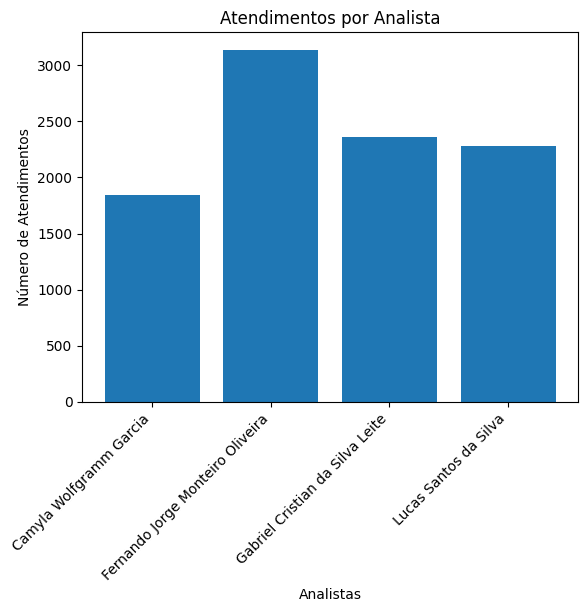

In [ ]:
analistas_desejados = ['Camyla Wolfgramm Garcia', 'Fernando Jorge Monteiro Oliveira', 'Gabriel Cristian da Silva Leite', 'Lucas Santos da Silva']
df_filtrado = df_analista[df_analista['Analista'].isin(analistas_desejados)]
contagem = df_filtrado.groupby(['Analista']).size().reset_index(name='Numero de Atendimentos')

plt.bar(contagem['Analista'], contagem['Numero de Atendimentos'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Analistas')
plt.ylabel('Número de Atendimentos')
plt.title('Atendimentos por Analista')
plt.show()

**GRÁFICO ---> QUANTIDADE DE ATENDIMENTOS POR ANALISTA** - UTILIZANDO PLOTLY

In [ ]:
# Lista dos analistas desejados
analistas_desejados = ['Camyla Wolfgramm Garcia', 'Fernando Jorge Monteiro Oliveira', 'Gabriel Cristian da Silva Leite', 'Lucas Santos da Silva']

# Filtrar o DataFrame para incluir apenas os analistas desejados
df_filtrado = df_analista[df_analista['Analista'].isin(analistas_desejados)]

# Agrupar pelo Analista e contar o número de atendimentos
contagem = df_filtrado.groupby(['Analista']).size().reset_index(name='Numero de Atendimentos')

# Criar o gráfico de barras
fig = go.Figure(data=[go.Bar(x=contagem['Analista'], y=contagem['Numero de Atendimentos'])])

# Personalizar o layout do gráfico
fig.update_layout(title='Número de Atendimentos por Analista',
                  xaxis_title='Analista',
                  yaxis_title='Número de Atendimentos')

# Exibir o gráfico
fig.show()


**ATENDIMENTO POR CATEGORIA**

In [ ]:
contagem = df_analista.groupby('Categoria').size().reset_index(name='Numero de Atendimentos')
contagem = contagem.sort_values('Numero de Atendimentos', ascending=False)
display(contagem)

#GRÁFICO EM PLOTLY
fig = px.bar(contagem, x='Categoria', y='Numero de Atendimentos', title='Quantidade de Atendimentos por Categoria')
fig.show()


,Categoria,Numero de Atendimentos
38,Retaguarda,2780
43,Sistemas de Crédito,2656
32,Meios de Pagamentos,2334
21,Duvidas,1890
42,Sistemas Internos,581
41,Sistemas Bancários,489
40,Seguros,326
10,Canais Eletrônicos,251
44,Sistemas de Recursos Humanos,230
30,Investimentos,174


**----------> ANALISTA vs CATEGORIA**

In [ ]:
df_analista = df_analista[df_analista['Analista'].isin(['Camyla Wolfgramm Garcia', 'Fernando Jorge Monteiro Oliveira', 'Gabriel Cristian da Silva Leite', 'Lucas Santos da Silva'])]
contagem = df_analista.groupby(['Analista', 'Categoria']).size().reset_index(name='Numero de Atendimentos')
contagem = contagem.sort_values(by=['Analista', 'Numero de Atendimentos'], ascending=[True, False])
display(contagem)


,Analista,Categoria,Numero de Atendimentos
30,Camyla Wolfgramm Garcia,Sistemas de Crédito,413
21,Camyla Wolfgramm Garcia,Meios de Pagamentos,394
26,Camyla Wolfgramm Garcia,Retaguarda,315
16,Camyla Wolfgramm Garcia,Duvidas,229
29,Camyla Wolfgramm Garcia,Sistemas Internos,112
...,...,...,...
109,Lucas Santos da Silva,Comunicação,1
111,Lucas Santos da Silva,Dispositivo Removível,1
120,Lucas Santos da Silva,Pasta de Rede,1
122,Lucas Santos da Silva,SUROP,1


**----------> ANALISTA vs CATEGORIA** - GRÁFICO

In [ ]:
# Lista dos analistas desejados
analistas_desejados = ['Camyla Wolfgramm Garcia', 'Fernando Jorge Monteiro Oliveira', 'Gabriel Cristian da Silva Leite', 'Lucas Santos da Silva']

# Loop para gerar um gráfico separado para cada analista
for analista in analistas_desejados:
    # Filtra o DataFrame apenas para o analista atual
    df_analista_atual = df_analista[df_analista['Analista'] == analista]

    # Calcula a contagem de atendimentos por categoria de atendimento
    contagem_atual = df_analista_atual.groupby('Categoria').size().reset_index(name='Numero de Atendimentos')

    # Gera o gráfico usando a biblioteca Plotly
    fig = go.Figure([go.Bar(x=contagem_atual['Categoria'], y=contagem_atual['Numero de Atendimentos'])])
    fig.update_layout(title=f'Contagem de Atendimentos por Categoria - Analista: {analista}', xaxis_title='Categoria de Atendimento', yaxis_title='Numero de Atendimentos')
    fig.show()


**POR SUBCATEGORIA**

In [ ]:
contagem = df_analista.groupby('SubCategoria').size().reset_index(name='Numero de Atendimentos')
contagem = contagem.sort_values('Numero de Atendimentos', ascending=False)
display(contagem)

#GRÁFICO EM PLOTLY
fig = px.bar(contagem, x='SubCategoria', y='Numero de Atendimentos', title='Quantidade de Atendimentos por SubCategoria')
fig.show()


,SubCategoria,Numero de Atendimentos
35,Desbloqueio de usuário,3173
0,Alterar Perfil,1956
60,Orientação ao Usuário,1821
92,Solicitação de Acesso,1011
87,Retorno de Perfil,771
...,...,...
21,Computador infectado com vírus,1
18,Bloqueio de usuário,1
16,BanparCard Cargos Eletivos(Relatar falhar),1
76,Relatar Falha - Falha no Upload de Arquivos,1


**----------> ANALISTA vs SUBCATEGORIA**

In [ ]:
df_analista = df_analista[df_analista['Analista'].isin(['Camyla Wolfgramm Garcia', 'Fernando Jorge Monteiro Oliveira', 'Gabriel Cristian da Silva Leite', 'Lucas Santos da Silva'])]
contagem = df_analista.groupby(['Analista', 'SubCategoria']).size().reset_index(name='Numero de Atendimentos')
contagem = contagem.sort_values(by=['Analista', 'Numero de Atendimentos'], ascending=[True, False])
display(contagem)

,Analista,SubCategoria,Numero de Atendimentos
16,Camyla Wolfgramm Garcia,Desbloqueio de usuário,658
0,Camyla Wolfgramm Garcia,Alterar Perfil,458
43,Camyla Wolfgramm Garcia,Solicitação de Acesso,282
29,Camyla Wolfgramm Garcia,Orientação ao Usuário,239
34,Camyla Wolfgramm Garcia,Relatar Falha,41
...,...,...,...
221,Lucas Santos da Silva,Relatar Falha Softphone IP Desktop,1
222,Lucas Santos da Silva,Reset de Senha,1
224,Lucas Santos da Silva,Sistema Indisponivel,1
226,Lucas Santos da Silva,Solicitar imagens de transações,1


**----------> ANALISTA vs SUBCATEGORIA** - GRÁFICO

In [ ]:
# Lista dos analistas desejados
analistas_desejados = ['Camyla Wolfgramm Garcia', 'Fernando Jorge Monteiro Oliveira', 'Gabriel Cristian da Silva Leite', 'Lucas Santos da Silva']

# Loop para gerar um gráfico separado para cada analista
for analista in analistas_desejados:
    # Filtra o DataFrame apenas para o analista atual
    df_analista_atual = df_analista[df_analista['Analista'] == analista]

    # Calcula a contagem de atendimentos por categoria de atendimento
    contagem_atual = df_analista_atual.groupby('SubCategoria').size().reset_index(name='Numero de Atendimentos')

    # Gera o gráfico usando a biblioteca Plotly
    fig = go.Figure([go.Bar(x=contagem_atual['SubCategoria'], y=contagem_atual['Numero de Atendimentos'])])
    fig.update_layout(title=f'Contagem de Atendimentos por SubCategoria - Analista: {analista}', xaxis_title='SubCategoria de Atendimento', yaxis_title='Numero de Atendimentos')
    fig.show()


**POR SERVIÇO**

In [ ]:
contagem = df_analista.groupby('Servico').size().reset_index(name='Numero de Atendimentos')
contagem = contagem.sort_values('Numero de Atendimentos', ascending=False)
display(contagem)

#GRÁFICO EM PLOTLY
fig = px.bar(contagem, x='Servico', y='Numero de Atendimentos', title='Quantidade de Atendimentos por Serviço')
fig.show()


,Servico,Numero de Atendimentos
32,Conta Corrente (WEB),2015
10,Atendimento Telefônico,1607
81,SCMC,685
59,MultiservNet (MSNET),680
66,Pd_cred,409
...,...,...
92,SISARC,1
42,GRISCO,1
94,SMS,1
41,GESCOB,1


**----------> ANALISTA vs SERVIÇO**

In [ ]:
df_analista = df_analista[df_analista['Analista'].isin(['Camyla Wolfgramm Garcia', 'Fernando Jorge Monteiro Oliveira', 'Gabriel Cristian da Silva Leite', 'Lucas Santos da Silva'])]
contagem = df_analista.groupby(['Analista', 'Servico']).size().reset_index(name='Numero de Atendimentos')
contagem = contagem.sort_values(by=['Analista', 'Numero de Atendimentos'], ascending=[True, False])
display(contagem)

,Analista,Servico,Numero de Atendimentos
20,Camyla Wolfgramm Garcia,Conta Corrente (WEB),306
6,Camyla Wolfgramm Garcia,Atendimento Telefônico,229
57,Camyla Wolfgramm Garcia,SCMC,151
41,Camyla Wolfgramm Garcia,MultiservNet (MSNET),141
39,Camyla Wolfgramm Garcia,Multiserv Agência,92
...,...,...,...
284,Lucas Santos da Silva,SGBIGC - Central de Risco,1
285,Lucas Santos da Silva,SIAFEM,1
291,Lucas Santos da Silva,Servidor,1
296,Lucas Santos da Silva,Suprimento de Fundos,1


**----------> ANALISTA vs SERVIÇO** - GRÁFICO

In [ ]:
# Lista dos analistas desejados
analistas_desejados = ['Camyla Wolfgramm Garcia', 'Fernando Jorge Monteiro Oliveira', 'Gabriel Cristian da Silva Leite', 'Lucas Santos da Silva']

# Loop para gerar um gráfico separado para cada analista
for analista in analistas_desejados:
    # Filtra o DataFrame apenas para o analista atual
    df_analista_atual = df_analista[df_analista['Analista'] == analista]

    # Calcula a contagem de atendimentos por categoria de atendimento
    contagem_atual = df_analista_atual.groupby('Servico').size().reset_index(name='Numero de Atendimentos')

    # Gera o gráfico usando a biblioteca Plotly
    fig = go.Figure([go.Bar(x=contagem_atual['Servico'], y=contagem_atual['Numero de Atendimentos'])])
    fig.update_layout(title=f'Contagem de Atendimentos por Serviço - Analista: {analista}', xaxis_title='Serviço de Atendimento', yaxis_title='Numero de Atendimentos')
    fig.show()


**POR PRIORIDADE**

In [ ]:
contagem = df_analista.groupby('Prioridade').size().reset_index(name='Numero de Atendimentos')
display(contagem)

#GRÁFICO EM PLOTLY
fig = px.bar(contagem, x='Prioridade', y='Numero de Atendimentos', title='Quantidade de Atendimentos por Serviço')
fig.show()


,Prioridade,Numero de Atendimentos
0,1,189
1,2,3340
2,3,3244
3,4,58
4,5,100
5,6,2693


**----------> ANALISTA vs PRIORIDADE**

In [ ]:
df_analista = df_analista[df_analista['Analista'].isin(['Camyla Wolfgramm Garcia', 'Fernando Jorge Monteiro Oliveira', 'Gabriel Cristian da Silva Leite', 'Lucas Santos da Silva'])]
contagem = df_analista.groupby(['Analista', 'Prioridade']).size().reset_index(name='Numero de Atendimentos')
display(contagem)

,Analista,Prioridade,Numero de Atendimentos
0,Camyla Wolfgramm Garcia,1,43
1,Camyla Wolfgramm Garcia,2,708
2,Camyla Wolfgramm Garcia,3,788
3,Camyla Wolfgramm Garcia,4,10
4,Camyla Wolfgramm Garcia,5,21
5,Camyla Wolfgramm Garcia,6,270
6,Fernando Jorge Monteiro Oliveira,1,33
7,Fernando Jorge Monteiro Oliveira,2,751
8,Fernando Jorge Monteiro Oliveira,3,914
9,Fernando Jorge Monteiro Oliveira,4,9


**----------> ANALISTA vs PRIORIDADE** - GRÁFICO

In [ ]:
# Lista dos analistas desejados
analistas_desejados = ['Camyla Wolfgramm Garcia', 'Fernando Jorge Monteiro Oliveira', 'Gabriel Cristian da Silva Leite', 'Lucas Santos da Silva']

# Loop para gerar um gráfico separado para cada analista
for analista in analistas_desejados:
    # Filtra o DataFrame apenas para o analista atual
    df_analista_atual = df_analista[df_analista['Analista'] == analista]

    # Calcula a contagem de atendimentos por categoria de atendimento
    contagem_atual = df_analista_atual.groupby('Prioridade').size().reset_index(name='Numero de Atendimentos')

    # Gera o gráfico usando a biblioteca Plotly
    fig = go.Figure([go.Bar(x=contagem_atual['Prioridade'], y=contagem_atual['Numero de Atendimentos'])])
    fig.update_layout(title=f'Contagem de Atendimentos por Prioridade - Analista: {analista}', xaxis_title='Prioridade de Atendimento', yaxis_title='Numero de Atendimentos')
    fig.show()


**GRÁFICO ---> POR PRIORIDADE** - UTILIZANDO PLOTLY

In [ ]:
# Lista dos analistas desejados
analistas_desejados = ['Camyla Wolfgramm Garcia', 'Fernando Jorge Monteiro Oliveira', 'Gabriel Cristian da Silva Leite', 'Lucas Santos da Silva']

# Filtra o DataFrame apenas para os analistas desejados
df_analista_filtrado = df_analista[df_analista['Analista'].isin(analistas_desejados)]

# Calcula a contagem de atendimentos por analista e por prioridade
contagem01 = df_analista_filtrado.groupby(['Analista', 'Prioridade']).size().reset_index(name='Numero de Atendimentos')

# Cria o gráfico em Plotly
fig = px.bar(contagem01, x='Analista', y='Numero de Atendimentos', color='Prioridade', barmode='group')

# Configurações de layout
fig.update_layout(title='Atendimentos por Prioridade e Analista',
                  xaxis_title='Analista',
                  yaxis_title='Número de Atendimentos')

# Exibe o gráfico
fig.show()


**POR SLA 100% ATINGIDO**

In [ ]:
contagem = df_analista.groupby('SLA 100% Atingido').size().reset_index(name='Numero de Atendimentos')
contagem = contagem.sort_values('Numero de Atendimentos', ascending=False)
display(contagem)

#GRÁFICO EM PLOTLY
fig = px.bar(contagem, x='SLA 100% Atingido', y='Numero de Atendimentos', title='Quantidade de Atendimentos por SLA 100% Atingido')
fig.show()

,SLA 100% Atingido,Numero de Atendimentos
0,Falso,9430
1,Verdadeiro,194


**----------> ANALISTA vs SLA 100% Atingido**

In [ ]:
df_analista = df_analista[df_analista['Analista'].isin(['Camyla Wolfgramm Garcia', 'Fernando Jorge Monteiro Oliveira', 'Gabriel Cristian da Silva Leite', 'Lucas Santos da Silva'])]
contagem = df_analista.groupby(['Analista', 'SLA 100% Atingido']).size().reset_index(name='Numero de Atendimentos')
display(contagem)

,Analista,SLA 100% Atingido,Numero de Atendimentos
0,Camyla Wolfgramm Garcia,Falso,1822
1,Camyla Wolfgramm Garcia,Verdadeiro,18
2,Fernando Jorge Monteiro Oliveira,Falso,2999
3,Fernando Jorge Monteiro Oliveira,Verdadeiro,142
4,Gabriel Cristian da Silva Leite,Falso,2347
5,Gabriel Cristian da Silva Leite,Verdadeiro,18
6,Lucas Santos da Silva,Falso,2262
7,Lucas Santos da Silva,Verdadeiro,16


**----------> ANALISTA vs SLA 100% Atingido** - GRÁFICO

In [ ]:
# Lista dos analistas desejados
analistas_desejados = ['Camyla Wolfgramm Garcia', 'Fernando Jorge Monteiro Oliveira', 'Gabriel Cristian da Silva Leite', 'Lucas Santos da Silva']

# Loop para gerar um gráfico separado para cada analista
for analista in analistas_desejados:
    # Filtra o DataFrame apenas para o analista atual
    df_analista_atual = df_analista[df_analista['Analista'] == analista]

    # Calcula a contagem de atendimentos por categoria de atendimento
    contagem_atual = df_analista_atual.groupby('SLA 100% Atingido').size().reset_index(name='Numero de Atendimentos')

    # Gera o gráfico usando a biblioteca Plotly
    fig = go.Figure([go.Bar(x=contagem_atual['SLA 100% Atingido'], y=contagem_atual['Numero de Atendimentos'])])
    fig.update_layout(title=f'Contagem de Atendimentos por SLA 100% Atingido - Analista: {analista}', xaxis_title='SLA 100% Atingido de Atendimento', yaxis_title='Numero de Atendimentos')
    fig.show()


**GRÁFICO POR SLA 100% ATINGIDO** -- UTILIZANDO PLOTLY

In [ ]:
analistas_especificos = ['Camyla Wolfgramm Garcia', 'Fernando Jorge Monteiro Oliveira', 'Gabriel Cristian da Silva Leite', 'Lucas Santos da Silva']

contagem02 = df_analista[df_analista['Analista'].isin(analistas_especificos)].groupby(['Analista', 'SLA 100% Atingido']).size().reset_index(name='Quantidade')

fig = px.bar(contagem02, x='SLA 100% Atingido', y='Quantidade', color='Analista', barmode='group')
fig.update_layout(title='Quantidade de atendimentos com SLA 100% atingido por analista')
fig.show()

**POR TipoPTBRTemp**

In [ ]:
contagem = df_analista.groupby('TipoPTBRTemp').size().reset_index(name='Numero de Atendimentos')
contagem = contagem.sort_values('Numero de Atendimentos', ascending=False)
display(contagem)

#GRÁFICO EM PLOTLY
fig = px.bar(contagem, x='TipoPTBRTemp', y='Numero de Atendimentos', title='Quantidade de Atendimentos por TipoPTBRTemp')
fig.show()

,TipoPTBRTemp,Numero de Atendimentos
1,Requisição,9258
0,Incidente,327


**----------> ANALISTA vs TipoPTBRTemp**

In [ ]:
df_analista = df_analista[df_analista['Analista'].isin(['Camyla Wolfgramm Garcia', 'Fernando Jorge Monteiro Oliveira', 'Gabriel Cristian da Silva Leite', 'Lucas Santos da Silva'])]
contagem = df_analista.groupby(['Analista', 'TipoPTBRTemp']).size().reset_index(name='Numero de Atendimentos')
display(contagem)

,Analista,TipoPTBRTemp,Numero de Atendimentos
0,Camyla Wolfgramm Garcia,Incidente,75
1,Camyla Wolfgramm Garcia,Requisição,1760
2,Fernando Jorge Monteiro Oliveira,Incidente,60
3,Fernando Jorge Monteiro Oliveira,Requisição,3073
4,Gabriel Cristian da Silva Leite,Incidente,93
5,Gabriel Cristian da Silva Leite,Requisição,2252
6,Lucas Santos da Silva,Incidente,99
7,Lucas Santos da Silva,Requisição,2173


**----------> ANALISTA vs TipoPTBRTemp** - GRÁFICO

In [ ]:
# Lista dos analistas desejados
analistas_desejados = ['Camyla Wolfgramm Garcia', 'Fernando Jorge Monteiro Oliveira', 'Gabriel Cristian da Silva Leite', 'Lucas Santos da Silva']

# Loop para gerar um gráfico separado para cada analista
for analista in analistas_desejados:
    # Filtra o DataFrame apenas para o analista atual
    df_analista_atual = df_analista[df_analista['Analista'] == analista]

    # Calcula a contagem de atendimentos por categoria de atendimento
    contagem_atual = df_analista_atual.groupby('TipoPTBRTemp').size().reset_index(name='Numero de Atendimentos')

    # Gera o gráfico usando a biblioteca Plotly
    fig = go.Figure([go.Bar(x=contagem_atual['TipoPTBRTemp'], y=contagem_atual['Numero de Atendimentos'])])
    fig.update_layout(title=f'Contagem de Atendimentos por TipoPTBRTemp - Analista: {analista}', xaxis_title='TipoPTBRTemp de Atendimento', yaxis_title='Numero de Atendimentos')
    fig.show()


**GRAFICO ---> TipoPTBRTemp** - UTILIZANDO PLOTLY

In [ ]:
analistas_especificos = ['Camyla Wolfgramm Garcia', 'Fernando Jorge Monteiro Oliveira', 'Gabriel Cristian da Silva Leite', 'Lucas Santos da Silva']

contagem04 = df_analista[df_analista['Analista'].isin(analistas_especificos)].groupby(['Analista', 'TipoPTBRTemp']).size().reset_index(name='Quantidade')

fig = px.bar(contagem04, x="Analista", y="Quantidade", color="TipoPTBRTemp", barmode="group",
             title="Quantidade de atendimentos por TipoPTBRTemp para cada analista")
fig.show()


**ABERTURA DOS CHAMADOS**

In [ ]:
# converter a coluna "Created Date Time" para o tipo datetime
df_analista['Created Date Time'] = pd.to_datetime(df_analista['Created Date Time'])

# extrair a hora do início do atendimento e criar uma nova coluna
df_analista['Hora_Chamado'] = df_analista['Created Date Time'].dt.hour

# criar os bins para os intervalos de hora
bins = range(0, 24, 1)

# criar as labels para os intervalos de hora
labels = [f"{i}:00-{i+1}:00" for i in range(0, 23, 1)]

# criar a coluna com os intervalos de hora
df_analista['Intervalo_Horas'] = pd.cut(df_analista['Hora_Chamado'], bins=bins, labels=labels, include_lowest=True)

# contar a quantidade de atendimentos por intervalo de hora
contagem = df_analista['Intervalo_Horas'].value_counts().reset_index().rename(columns={'index': 'Intervalo', 'Intervalo_Horas': 'Quantidade'})

# ordenar os intervalos de hora
contagem = contagem.sort_values(by='Intervalo')

# exibir o gráfico
display(contagem)


,Intervalo,Quantidade
16,0:00-1:00,3
19,1:00-2:00,1
14,2:00-3:00,4
21,3:00-4:00,0
17,4:00-5:00,3
15,5:00-6:00,4
10,6:00-7:00,84
7,7:00-8:00,682
1,8:00-9:00,1436
0,9:00-10:00,1709


**ABERTURA DOS CHAMADOS** - GRÁFICO 01

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=contagem['Intervalo'], y=contagem['Quantidade']))
fig.update_layout(title='Horários com mais abertura de chamados',
                  xaxis_title='Horário',
                  yaxis_title='Quantidade de chamados')
fig.show()


**ABERTURA DOS CHAMADOS** - GRÁFICO 02

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=contagem['Intervalo'], y=contagem['Quantidade'], mode='lines'))
fig.update_layout(title='Horários com mais abertura de chamados',
                  xaxis_title='Horário',
                  yaxis_title='Quantidade de chamados')
fig.show()

**POR HORA DO DIA**

In [ ]:
# converter a coluna "InicioEmAtendimento" para o tipo datetime
df_analista['InicioEmAtendimento'] = pd.to_datetime(df_analista['InicioEmAtendimento'])

# extrair a hora do início do atendimento e criar uma nova coluna
df_analista['Hora_do_Dia'] = df_analista['InicioEmAtendimento'].dt.hour

# criar os bins para os intervalos de hora
bins = range(0, 24, 1)

# criar as labels para os intervalos de hora
labels = [f"{i}:00-{i+1}:00" for i in range(0, 23, 1)]

# criar a coluna com os intervalos de hora
df_analista['Intervalo_Horas'] = pd.cut(df_analista['Hora_do_Dia'], bins=bins, labels=labels, include_lowest=True)

# contar a quantidade de atendimentos por intervalo de hora
contagem = df_analista['Intervalo_Horas'].value_counts().reset_index().rename(columns={'index': 'Intervalo', 'Intervalo_Horas': 'Quantidade'})

# ordenar os intervalos de hora
contagem = contagem.sort_values(by='Intervalo')

# exibir o gráfico
display(contagem)


,Intervalo,Quantidade
16,0:00-1:00,0
17,1:00-2:00,0
21,2:00-3:00,0
20,3:00-4:00,0
19,4:00-5:00,0
18,5:00-6:00,0
5,6:00-7:00,676
8,7:00-8:00,551
2,8:00-9:00,841
0,9:00-10:00,1263


**POR HORA DO DIA** -GRÁFICO 01

In [ ]:
fig = px.bar(contagem, x='Intervalo', y='Quantidade', 
             title='Quantidade de Atendimentos por Intervalo de Hora', 
             labels={'Intervalo': 'Intervalo de Hora', 'Quantidade': 'Quantidade de Atendimentos'})
fig.show()


**POR HORA DO DIA** -GRÁFICO 02

In [ ]:
# criar a figura do gráfico
fig = go.Figure()

# adicionar a linha do gráfico
fig.add_trace(go.Scatter(
    x=contagem['Intervalo'],
    y=contagem['Quantidade'],
    line=dict(width=3, color='darkblue'),
    fill='tozeroy',
    fillcolor='rgba(30, 144, 255, 0.3)',
    mode='lines',
    name='Quantidade de atendimentos'
))

# configurar o layout do gráfico
fig.update_layout(
    title='Quantidade de atendimentos por intervalo de hora',
    xaxis_title='Intervalo de hora',
    yaxis_title='Quantidade de atendimentos',
    template='plotly_white',
    height=400,
    margin=dict(l=50, r=50, t=50, b=50),
    showlegend=False
)

# exibir o gráfico
fig.show()


In [ ]:
# converter a coluna "Created Date Time" para o tipo datetime
df_analista['Created Date Time'] = pd.to_datetime(df_analista['Created Date Time'])

# extrair a data do chamado e criar uma nova coluna
df_analista['Data_Chamado'] = df_analista['Created Date Time'].dt.date

# contar a quantidade de chamados por data
contagem = df_analista['Data_Chamado'].value_counts().reset_index().rename(columns={'index': 'Data', 'Data_Chamado': 'Quantidade'})

# ordenar as datas
contagem = contagem.sort_values(by='Data')

# exibir a contagem
display(contagem)


,Data,Quantidade
4,2023-02-01,256
25,2023-02-02,156
50,2023-02-03,123
6,2023-02-06,238
34,2023-02-07,144
...,...,...
20,2023-04-25,164
37,2023-04-26,140
58,2023-04-27,90
57,2023-04-28,103


**POR MÊS**

In [ ]:
# converter a coluna "Created Date Time" para o tipo datetime
df_analista['Created Date Time'] = pd.to_datetime(df_analista['Created Date Time'])

# extrair o mês de criação do chamado e criar uma nova coluna
df_analista['Mes_Chamado'] = df_analista['Created Date Time'].dt.month

# contar a quantidade de chamados por mês
contagem = df_analista['Mes_Chamado'].value_counts().reset_index().rename(columns={'index': 'Mes', 'Mes_Chamado': 'Quantidade'})

# ordenar os meses
contagem = contagem.sort_values(by='Mes')

# exibir a contagem por mês
display(contagem)


,Mes,Quantidade
2,2,2910
0,3,3546
1,4,3168


**POR MÊS** - GRÁFICO

In [ ]:
import plotly.express as px

fig = px.bar(contagem, x='Mes', y='Quantidade', color='Mes',
             labels={'Mes': 'Mês', 'Quantidade': 'Quantidade de Chamados'},
             title='Contagem de Chamados por Mês')

fig.show()


In [ ]:
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=contagem['Mes'], y=contagem['Quantidade'], mode='lines+markers',
                         marker=dict(size=10, color=contagem['Mes'], colorscale='Rainbow'),
                         line=dict(color='black', width=2),
                         name='Quantidade de Chamados'))

fig.update_layout(title='Contagem de Chamados por Mês',
                  xaxis_title='Mês',
                  yaxis_title='Quantidade de Chamados')

fig.show()
